<a href="https://colab.research.google.com/github/morsheduluofc/MachineLearning/blob/main/RandomForestClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Random Forest Classifier**

-- Link: https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

**All steps:**

-- State the question and determine required data

-- Acquire the data in an accessible format

-- Identify and correct missing data points/anomalies as required

-- Prepare the data for the machine learning model

-- Establish a baseline model that you aim to exceed

-- Train the model on the training data

-- Make predictions on the test data

-- Compare predictions to the known test set targets and calculate performance metrics

-- If performance is not satisfactory, adjust the model, acquire more data, or try a different modeling technique

-- Interpret model and report results visually and numerically


In [ ]:
# Pandas is used for data manipulation
import pandas as pd
# Read in data and display first 5 rows
features = pd.read_csv('Data/temps.csv')
features.head(5)

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [ ]:
print(features.shape)

(348, 12)


In [ ]:
features.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


Text(0, 0.5, 'Temperature')

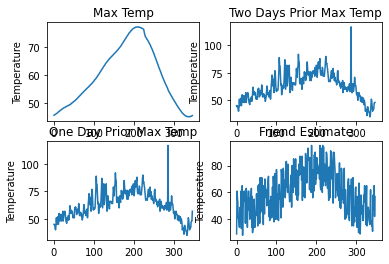

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,2)
axs[0,0].plot(features['average'])
axs[0,0].set_title('Max Temp')
axs[0,0].set_ylabel('Temperature')

axs[0,1].plot(features['temp_2'])
axs[0,1].set_title('Two Days Prior Max Temp')
axs[0,1].set_ylabel('Temperature')

axs[1,0].plot(features['temp_1'])
axs[1,0].set_title('One Day Prior Max Temp')
axs[1,0].set_ylabel('Temperature')

axs[1,1].plot(features['friend'])
axs[1,1].set_title('Friend Estimate')
axs[1,1].set_ylabel('Temperature')

In [ ]:
#One hot encoding
features = pd.get_dummies(features)
# Display the first 5 rows of the last 12 columns
features.head(5)

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,46,46,46,41,0,0,0,0,0,1,0
